# QASR Python Workshop

### Hi! 

In this workshop, we'll go through a full data analysis workflow, showing some strengths of Python as a data analysis environment. First, let's import the packages we'll need:

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics, linear_model

random.seed('qasr')
matplotlib.style.use('ggplot')
%matplotlib inline

Now, lets load our dataset. We'll download it from a URL and load it into a pandas DataFrame.

In [2]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

names = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'year',
    'origin',
    'model'
]

raw_data = pd.read_table(data_url, delim_whitespace=True, header=None, na_values=['?'], names=names)
raw_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


This is a `pandas` `DataFrame`. Similar to the R `data.frame`, this is the premier object for tabular data analysis. `pandas`, a library written by Wes McKinney, extended the foundations of NumPy, allows for easy, sophisticated data analysis.

We will demonstrate some functionality, specifically for data exploration.

In [3]:
raw_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Ok, what do we have? Eight columns, seems like 398 readings in total. Although, it looks like we have a few missing `horsepower` readings. That might cause a problem in our analysis, so let's drop them for now. Also, the `origin` and `model` columns won't be super relevant for us, so let's drop those as well.

In [4]:
data = raw_data.drop(['model', 'origin'], axis=1).dropna().reset_index(drop=True)

Great. Now, let's try and get a sense of our data.

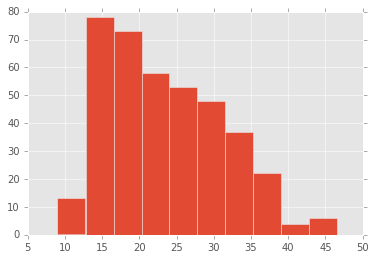

In [5]:
data['mpg'].hist()

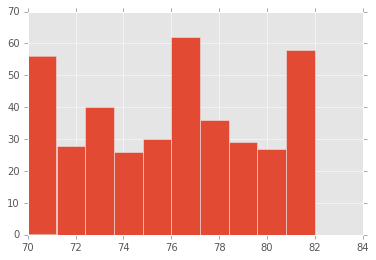

In [6]:
data['year'].hist()

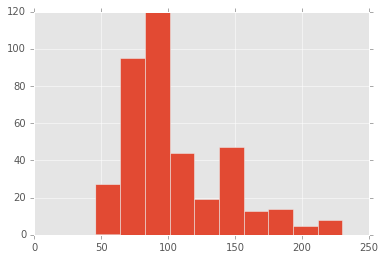

In [7]:
data['horsepower'].hist()

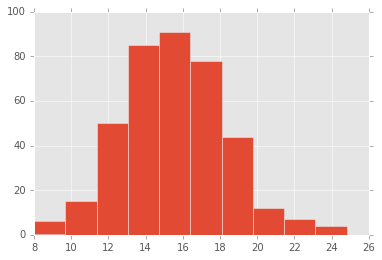

In [8]:
data['acceleration'].hist()

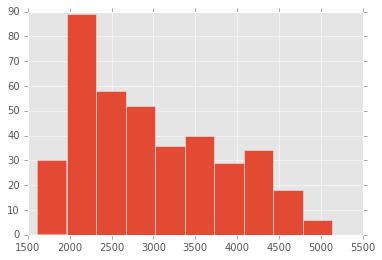

In [9]:
data['weight'].hist()

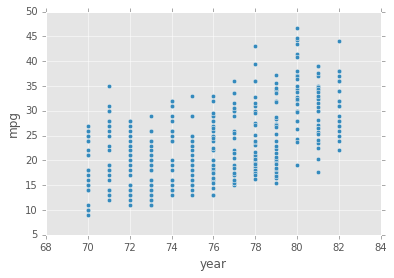

In [10]:
data.plot.scatter(x='year', y='mpg')

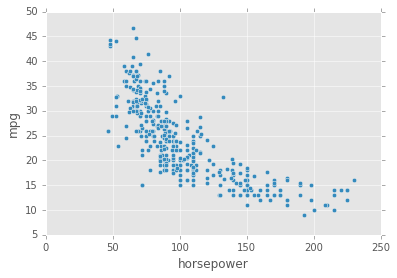

In [11]:
data.plot.scatter(x='horsepower', y='mpg')

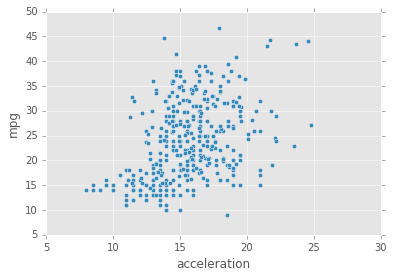

In [12]:
data.plot.scatter(x='acceleration', y='mpg')

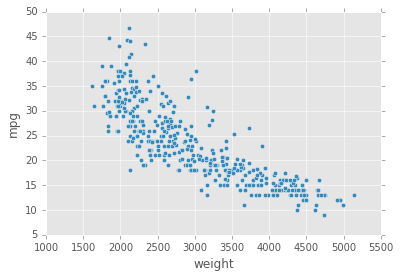

In [13]:
data.plot.scatter(x='weight', y='mpg')

Pretty handy for visualisation. But what if we'd like some more concrete statistics? pandas delivers.


In [14]:
data.groupby('year').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration
year,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276
71,21.111111,5.629630,213.888889,107.037037,3030.592593,15.000000
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.769231,5.230769,170.653846,94.230769,2878.038462,16.173077
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


Just kidding. More visualizations:

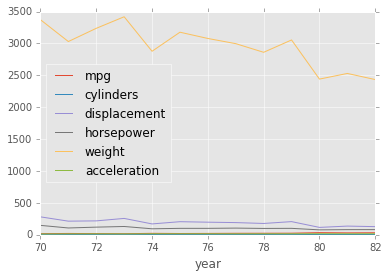

In [15]:
data.groupby('year').mean().plot()

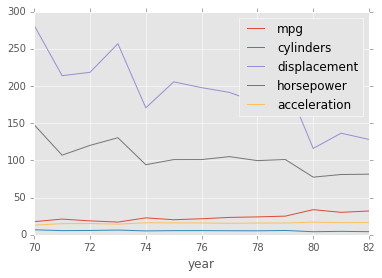

In [16]:
data.groupby('year').mean().drop('weight', 1).plot()

Now, let's demonstrate some features of Scikit-Learn, a Python popular machine learning library.

To do this, we will:

1. Remove features from the data we don't care about.
2. Split the data randomly into a train and test set.

In [17]:
idx = range(len(data))
idx[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
random.shuffle(idx)
idx[:10]

[87, 273, 88, 94, 363, 349, 264, 47, 190, 48]

We can use this shuffled list to split the data into two random sets:

In [19]:
data.ix[idx[:3]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
87,14.0,8,302.0,137.0,4042.0,14.5,73
273,17.0,6,163.0,125.0,3140.0,13.6,78
88,15.0,8,318.0,150.0,3777.0,12.5,73


In [20]:
train_size = 0.7 # Percent
cutoff = int(len(idx) * train_size)
cutoff

274

In [24]:
X, Y = data.drop(['mpg'], axis=1), data['mpg']

X_train, Y_train = X.ix[idx[:cutoff]], Y.ix[idx[:cutoff]]
X_test, Y_test = X.ix[idx[cutoff:]], Y.ix[idx[cutoff:]]

Our goal is to predict `mpg` using the numerical covariates. This means we'll consider all factors except `model`, which is represented as text.

In [25]:
model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a peek at the regression coefficients:

In [26]:
for i, covar in enumerate(X.columns):
    print(covar, model.coef_[i])

('cylinders', -0.16082012265940121)
('displacement', 0.0042226207836988869)
('horsepower', -0.004227660079656189)
('weight', -0.0066503124921343066)
('acceleration', 0.046539340466860063)
('year', 0.70659297611234473)


In [27]:
Y_pred = model.predict(X_test)
metrics.mean_absolute_error(Y_test, Y_pred)

2.7943068069594785